# Start

In [4]:
import pandas as pd
import numpy as np
import pickle 

import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import re
import nltk
from nltk.util import pr
from nltk.corpus import stopwords
import string 

In [1]:
# maximum text
# sb.set()
# pd.set_option('display.max_colwidth', None)

# Load dataset

## SE2019 dataset

In [5]:
df = pd.read_csv("Dataset/SE2019/data_processed.csv")
df['class'].value_counts()

class
Non-Hate    5195
Hate        3781
Name: count, dtype: int64

In [6]:
df.head(5)

,class,text,hate
0,Hate,hurray saving us many ways #lockthemup #buildt...,1
1,Hate,would young fighting age men vast majority one...,1
2,Hate,illegals dump kids border like road kill refu...,1
3,Non-Hate,ny times nearly white states pose array proble...,0
4,Non-Hate,orban brussels european leaders ignoring peopl...,0


In [4]:
df[df['text'].isnull()]

,class,text,hate


# Split dataset

In [7]:
x = np.array(df["text"])
y = np.array(df["class"])

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state=42) #random state ensure same sample
print("Train Set :", x_train.shape, y_train.shape) 
print("Test Set  :", x_test.shape, y_test.shape) 

Train Set : (6283,) (6283,)
Test Set  : (2693,) (2693,)


In [66]:
# y in digit form
y_train_binary = np.array(list(map(lambda x:1 if x=="Hate" else 0, y_train)))
y_test_binary = np.array(list(map(lambda x:1 if x=="Hate" else 0, y_test)))

array(['austria wonder countri refug bill see socialwelfar also help get televisionset refug famili styria ',

In [9]:
x_train[:10]

array(['austria wonderful country refugees bill see socialwelfare also help get televisionset refugees family styria ',
       'please tell bitch next piercing line judgmental everyone fucking sees shut fuck',
       'afghan migrant whose deportation thwarted hero swedish student actually sentenced assault #foxnews',
       ' slavery post white women rape many black women men children u could ever imagine cause ',
       'bewildered eu leaders various plans preventing migrant refugee boat arrivals amp send heres helpful overview ',
       'waking today like ',
       'theyre sending best lot rapists scumbags lowest form dna fake family separatedxxf#stoptheinvasion#deportthemall #noamnesty#buildthewall ',
       'rt #chelseahandler #kimkardashian #kanye #kanyewest #cent #comedy #lol #lmao #memes #bruh #petty #funnyshit #truth ',
       'douglas todd trudeau government goes silent canadas syrian refugees via add alarming list governments fails ',
       'redhead girls hot ginger girls us

# Feature engineering - Word embeding

- Word2Vec and GloVe are based on static word embeddings while Transformers are based on dynamic word embeddings.

- Many different models for creating pre-trained word embeddings such as Word2Vec, GloVe, fastText, and BioWordVec 

- https://www.analyticsvidhya.com/blog/2017/06/word-embeddings-count-word2veec/
- CountVectorizer, Tfidftransformer & Tfidfvectorizer are Frequency based Word Embedding technique
- Tfidftransformer acts on sparse matrix and Tfidfvectorizer acts on raw text data
- Tfidfvectorizer = countVectorizater + Tfidftransformer

- https://www.analyticsvidhya.com/blog/2018/07/hands-on-sentiment-analysis-dataset-python/
- vectorizer = word embedding process of converting text data to numerical vector

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

## Word2Vec

- https://spotintelligence.com/2023/02/15/word2vec-for-text-classification/#:~:text=Word2Vec%20is%20a%20popular%20algorithm,a%20large%20corpus%20of%20text
- Word2vec is not a single algorithm but a combination of two techniques – CBOW(Continuous bag of words) and Skip-gram model.

In [9]:
from gensim.models import Word2Vec

In [10]:
class w2vVectorizer():
    def __init__(self) -> None:
        self.w2v_model = None
    
    def w2v_vectorizer(self,sentence):
        # vectorize the text data
        words = sentence.split()
        words_vec = [self.w2v_model.wv[word] for word in words if word in self.w2v_model.wv]
        if len(words_vec) == 0:
            return np.zeros(100)
        words_vec = np.array(words_vec)
        return words_vec.mean(axis=0)
    
    def fit(self, x, y=None):
        # train the model when fit the pipeline
        sentences = [sentence.split() for sentence in x]
        self.w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4)
        return self
    
    def transform(self, x, y=None):
        # when use fit or transform on the pipeline 
        return np.array([self.w2v_vectorizer(sentence) for sentence in x])

# Machine learning

In [10]:
# save model
def save_model(model, model_name):
    filename = f"models/{model_name}.pickle"
    pickle.dump(model, open(filename,"wb"))

## Decision Tree

In [14]:
#convert given text to a vector base
from sklearn.tree import DecisionTreeClassifier

In [424]:
model = Pipeline([('vect', CountVectorizer()),
               ('clf', DecisionTreeClassifier()),
              ])
model_name = "dtc"
model.fit(x_train, y_train)
save_model(model,model_name)

In [232]:
model = Pipeline([('vect', TfidfVectorizer()),
               ('clf', DecisionTreeClassifier()),
              ])
model_name = "dtc-tfid"
model.fit(x_train, y_train)
save_model(model,model_name)

In [233]:
model = Pipeline([('vect', w2vVectorizer()),
               ('clf', DecisionTreeClassifier()),
              ])
model_name = "dtc-w2v"
model.fit(x_train, y_train)
save_model(model,model_name)

## Support Vector Machine

- supervisied learning algorithm
- Unlike neural networks, SVMs can work with very small datasets and are not prone to overfitting.

In [39]:
from sklearn.linear_model import SGDClassifier

In [234]:
model = Pipeline([('vect', CountVectorizer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
model_name = "svm"
model.fit(x_train, y_train)
save_model(model, model_name)

In [235]:
model = Pipeline([('vect', TfidfVectorizer()),
               ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
              ])
model_name = "svm-tfid"
model.fit(x_train, y_train)
save_model(model, model_name)

In [236]:
model = Pipeline([('vect', w2vVectorizer()),
               ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
              ])
model_name = "svm-w2v"
model.fit(x_train, y_train)
save_model(model, model_name)

## Logistic Regression 

In [46]:
from sklearn.linear_model import LogisticRegression

In [237]:
model = Pipeline([('vect', CountVectorizer()),
        ('clf', LogisticRegression(n_jobs=1, C=1e5,max_iter=6300)),
        ])
model_name = "lr"
model.fit(x_train, y_train)
save_model(model, model_name)

In [238]:
model = Pipeline([('vect', TfidfVectorizer()),
        ('clf', LogisticRegression(n_jobs=1, C=1e5,max_iter=6300)),
        ])
model_name = "lr-tfid"
model.fit(x_train, y_train)
save_model(model, model_name)

In [239]:
model = Pipeline([('vect', w2vVectorizer()),
        ('clf', LogisticRegression(n_jobs=1, C=1e5,max_iter=6300)),
        ])
model_name = "lr-w2v"
model.fit(x_train, y_train)
save_model(model, model_name)

## Predict

In [ ]:
# Predict data
print("Test Data Accuracy  :\t", model.score(x_test, y_test))
y_test_pred = model.predict(x_test)

# Deep Neural network

- https://www.youtube.com/watch?v=oWo9SNcyxlI
- good read for = https://bmcmedresmethodol.biomedcentral.com/articles/10.1186/s12874-022-01665-y

- cnn
- transformer encoder
- pretrained bert
- typical neural network = rnn, gru, lstm, bi-lstm

- other than bert, the rest need word embedding so do glove, word2vec and fasttext


In [35]:
from keras.preprocessing.text import one_hot, Tokenizer
from keras.models import Sequential
from keras.utils.data_utils import pad_sequences
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, GlobalMaxPooling1D, Embedding, Conv1D, LSTM

from keras.metrics import BinaryAccuracy,Precision,Recall

from keras.layers import Layer
from keras.models import load_model
from keras.utils import plot_model
import keras

In [64]:
METRICS = [
    BinaryAccuracy(name="accuracy"),
    Precision(name="precision"),
    Recall(name="recall")
]

def save_model_nn(model, model_name):
    filename = f"models/{model_name}"
    model.save(filename)

Embeding layer convert text to numeric form which is used as the first layer for the deep learning model

## Glove embedding

In [150]:
text_length = 50

glove_encoder = keras.layers.TextVectorization(
    standardize = None,
    output_sequence_length=text_length, #pad/truncate text to this long
)
glove_encoder.adapt(x_train)
vocab = glove_encoder.get_vocabulary()
vocab_dict = dict(zip(v, range(len(v))))

# load glove to dictionay
embeddings_dic = dict()
glove_file = open("Dataset/glove_embedding.txt", encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dic[word] = vector_dimensions
glove_file.close()
print("Total words ", len(embeddings_dic))

# create vocab length is the size of token in dictionary
# Size of the vocabulary
vocab_length = len(vocab) + 1
embedding_dim = 100 #each glove word is 100 long

hits = 0
miss = 0

# create embedding matrix having 100 col
# for all vocab word we give it a vector value from glove
# for those not found in glove will be empty 0
# size of embedding_matriz = size of word_tokenizer.word_index.items()
# embedding_matrix is the weight 
embedding_matrix = np.zeros((vocab_length, embedding_dim))
for word, index in vocab_dict.items():
    embedding_vector = embeddings_dic.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
        hits += 1
    else:
        miss +=1
print("Converted %d words (%d misses)" % (hits, miss))

glove_embedding = Embedding(vocab_length, embedding_dim, 
               embeddings_initializer=keras.initializers.Constant(embedding_matrix), 
               trainable = False,
               input_length=text_length,
               mask_zero=True)

## FastText

## Simple Neural network

In [175]:
model = Sequential()
model.add(glove_encoder)
model.add(glove_embedding)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

history = model.fit(x_train, y_train_binary, epochs=10,
                    validation_data=(x_test,y_test_binary))

save_model_nn(model, "snn-glove")

## CNN 

- usually for 2d image recognition 
- use 1d cnn for text classification

In [364]:
from keras.layers import Conv1D

In [181]:
model = Sequential()
model.add(glove_encoder)
model.add(glove_embedding)
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

history = model.fit(x_train, y_train_binary, epochs=10,
                    validation_data=(x_test,y_test_binary))

save_model_nn(model, "cnn-glove")

Epoch 1/10
197/197 [==============================] - 7s 31ms/step - loss: 0.6051 - accuracy: 0.6680 - precision: 0.6301 - recall: 0.5131 - val_loss: 0.5761 - val_accuracy: 0.6992 - val_precision: 0.6387 - val_recall: 0.6489
Epoch 2/10
197/197 [==============================] - 6s 29ms/step - loss: 0.4727 - accuracy: 0.7832 - precision: 0.7686 - recall: 0.6962 - val_loss: 0.5746 - val_accuracy: 0.7018 - val_precision: 0.7551 - val_recall: 0.4264
Epoch 3/10
197/197 [==============================] - 6s 29ms/step - loss: 0.3827 - accuracy: 0.8451 - precision: 0.8443 - recall: 0.7765 - val_loss: 0.5665 - val_accuracy: 0.7092 - val_precision: 0.6841 - val_recall: 0.5683
Epoch 4/10
197/197 [==============================] - 6s 30ms/step - loss: 0.2904 - accuracy: 0.9136 - precision: 0.9124 - recall: 0.8798 - val_loss: 0.5639 - val_accuracy: 0.7148 - val_precision: 0.6721 - val_recall: 0.6232
Epoch 5/10
197/197 [==============================] - 6s 30ms/step - loss: 0.2111 - accuracy: 0.9529

INFO:tensorflow:Assets written to: models/cnn-glove\assets


INFO:tensorflow:Assets written to: models/cnn-glove\assets


## RNN - LSTM

- LSTM is a variant of RNN
- input -> textvectorization (encoder/token) -> emedding -> nn layer
- Now that all samples have a uniform length, the model must be informed that some part of the data is actually padding and should be ignored. That mechanism is masking.


In [ ]:
from keras.layers import LSTM

In [182]:
model = Sequential()
model.add(glove_encoder)
model.add(glove_embedding)
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

history = model.fit(x_train, y_train_binary, epochs=10,
                    validation_data=(x_test,y_test_binary))

save_model_nn(model, "lstm-glove")

Epoch 1/10
197/197 [==============================] - 72s 347ms/step - loss: 0.6031 - accuracy: 0.6817 - precision: 0.6327 - recall: 0.5827 - val_loss: 0.5538 - val_accuracy: 0.7170 - val_precision: 0.6676 - val_recall: 0.6463
Epoch 2/10
197/197 [==============================] - 62s 312ms/step - loss: 0.5473 - accuracy: 0.7175 - precision: 0.6817 - recall: 0.6208 - val_loss: 0.5331 - val_accuracy: 0.7330 - val_precision: 0.7132 - val_recall: 0.6064
Epoch 3/10
197/197 [==============================] - 60s 307ms/step - loss: 0.5131 - accuracy: 0.7458 - precision: 0.7141 - recall: 0.6638 - val_loss: 0.5225 - val_accuracy: 0.7464 - val_precision: 0.7282 - val_recall: 0.6294
Epoch 4/10
197/197 [==============================] - 62s 315ms/step - loss: 0.4754 - accuracy: 0.7708 - precision: 0.7376 - recall: 0.7098 - val_loss: 0.5124 - val_accuracy: 0.7430 - val_precision: 0.6936 - val_recall: 0.6924
Epoch 5/10
197/197 [==============================] - 61s 310ms/step - loss: 0.4419 - accura

INFO:tensorflow:Assets written to: models/lstm-glove\assets


INFO:tensorflow:Assets written to: models/lstm-glove\assets


## RNN 

- https://www.tensorflow.org/text/tutorials/text_classification_rnn

In [41]:
# not using standardize since already clean the text
encoder = keras.layers.TextVectorization(
    standardize = None,
    )
encoder.adapt(x_train)

In [122]:
#'input_dim' = the vocab size that we will choose. In other words it is the number of unique words in the vocab.
#'output_dim' = the number of dimensions we wish to embed into. Each word will be represented by a vector of this much dimensions.
model = keras.Sequential([
    encoder,
    keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    keras.layers.Bidirectional(keras.layers.LSTM(64)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5), #helps prevent overfitting
    keras.layers.Dense(1)
])

In [131]:
model = keras.Sequential([
    encoder,
    keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    keras.layers.Bidirectional(keras.layers.LSTM(64,  return_sequences=True)),
    keras.layers.Bidirectional(keras.layers.LSTM(32)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5), #helps prevent overfitting
    keras.layers.Dense(1)
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)
history = model.fit(x_train, y_train_binary, epochs=10,
                    validation_data=(x_test,y_test_binary),
                    verbose=0)
save_model_nn(model, "rnn-glove")

## GPT

- GPT-2 belongs to a family of deep learning models called “Transformers”. Transformers are the building block of the current state-of-the-art NLP architecture
- A typical transformers design contains two parts, encoder and decoders, both working as vectorized representation of word relationships.
- https://github.com/openai/openai-cookbook/blob/main/examples/Fine-tuned_classification.ipynb

In [1]:
import openai
import os

In [112]:
df_gpt = pd.DataFrame(zip(x_train,y_train_binary), columns = ['prompt', 'completion'])
df_gpt.to_json("Dataset/SE2019/gpt_data_train.jsonl", orient='records', lines=True)

df_gpt = pd.DataFrame(zip(x_test,y_test_binary), columns = ['prompt', 'completion'])
df_gpt.to_json("Dataset/SE2019/gpt_data_test.jsonl", orient='records', lines=True)

df_gpt["completion"].value_counts()

In [118]:
# do in cmd
!openai tools fine_tunes.prepare_data -f Dataset/SE2019/gpt_data_test.jsonl 

^C


In [14]:
# openai.File.create(
#   file=open("Dataset/SE2019/gpt_data_train_prepared_train.jsonl", "rb"),
#   purpose='fine-tune'
# )

# openai.File.create(
#   file=open("Dataset/SE2019/gpt_data_train_prepared_valid.jsonl", "rb"),
#   purpose='fine-tune'
# )

<File file id=file-XCtTOLLxI6jM59TlrDoT4LGL at 0x1d8e3f835f0> JSON: {
  "object": "file",
  "id": "file-XCtTOLLxI6jM59TlrDoT4LGL",
  "purpose": "fine-tune",
  "filename": "file",
  "bytes": 656131,
  "created_at": 1687786717,
  "status": "uploaded",
  "status_details": null
}

In [120]:
openai.FineTune.list()

<OpenAIObject list at 0x1d9425b9f10> JSON: {
  "object": "list",
  "data": [
    {
      "object": "fine-tune",
      "id": "ft-VwKO2vWcNtBJrPoZorUtFTVV",
      "hyperparams": {
        "n_epochs": 4,
        "batch_size": 8,
        "prompt_loss_weight": 0.01,
        "learning_rate_multiplier": 0.1,
        "classification_positive_class": " Hate",
        "compute_classification_metrics": true
      },
      "organization_id": "org-57m2RCBaIU5pd9nsTDikjeLg",
      "model": "ada",
      "training_files": [
        {
          "object": "file",
          "id": "file-XCtTOLLxI6jM59TlrDoT4LGL",
          "purpose": "fine-tune",
          "filename": "file",
          "bytes": 656131,
          "created_at": 1687786717,
          "status": "processed",
          "status_details": null
        }
      ],
      "validation_files": [
        {
          "object": "file",
          "id": "file-Do46v5kndAoPqdaR2ZVwbPT5",
          "purpose": "fine-tune",
          "filename": "file",
        

Uploaded file from Dataset/SE2019/gpt_data_train_prepared.jsonl: file-m1vI4bNTIIUnUZJwUM4eo2S3
Uploaded file from Dataset/SE2019/gpt_data_test_prepared.jsonl: file-GR7BA1XaebEeGZxz9QLB5sg8
Created fine-tune: ft-LAcA6GtvgJ0lksqRT8jwtzSx
Streaming events until fine-tuning is complete...

(Ctrl-C will interrupt the stream, but not cancel the fine-tune)
[2023-06-27 00:31:46] Created fine-tune: ft-LAcA6GtvgJ0lksqRT8jwtzSx




Upload progress:   0%|          | 0.00/745k [00:00<?, ?it/s]
Upload progress: 100%|██████████| 745k/745k [00:00<?, ?it/s]

Upload progress:   0%|          | 0.00/321k [00:00<?, ?it/s]
Upload progress: 100%|██████████| 321k/321k [00:00<00:00, 318Mit/s]


In [119]:
!openai api fine_tunes.create -m ada -t "Dataset/SE2019/gpt_data_train_prepared.jsonl" -v "Dataset/SE2019/gpt_data_test_prepared.jsonl" --compute_classification_metrics --classification_positive_class " 0"

^C


In [16]:
openai.FineTune.create(training_file ="file-XCtTOLLxI6jM59TlrDoT4LGL",
                       validation_file="file-Do46v5kndAoPqdaR2ZVwbPT5",
                       model = "ada",
                       compute_classification_metrics = True,
                       classification_positive_class = " Hate"
                       )

<FineTune fine-tune id=ft-VwKO2vWcNtBJrPoZorUtFTVV at 0x1d8e3fe31d0> JSON: {
  "object": "fine-tune",
  "id": "ft-VwKO2vWcNtBJrPoZorUtFTVV",
  "hyperparams": {
    "n_epochs": 4,
    "batch_size": null,
    "prompt_loss_weight": 0.01,
    "learning_rate_multiplier": null,
    "classification_positive_class": " Hate",
    "compute_classification_metrics": true
  },
  "organization_id": "org-57m2RCBaIU5pd9nsTDikjeLg",
  "model": "ada",
  "training_files": [
    {
      "object": "file",
      "id": "file-XCtTOLLxI6jM59TlrDoT4LGL",
      "purpose": "fine-tune",
      "filename": "file",
      "bytes": 656131,
      "created_at": 1687786717,
      "status": "processed",
      "status_details": null
    }
  ],
  "validation_files": [
    {
      "object": "file",
      "id": "file-Do46v5kndAoPqdaR2ZVwbPT5",
      "purpose": "fine-tune",
      "filename": "file",
      "bytes": 122361,
      "created_at": 1687786754,
      "status": "processed",
      "status_details": null
    }
  ],
  "res

In [185]:
openai.FineTune.retrieve(id="ft-LAcA6GtvgJ0lksqRT8jwtzSx")

<FineTune fine-tune id=ft-LAcA6GtvgJ0lksqRT8jwtzSx at 0x1d922d92ab0> JSON: {
  "object": "fine-tune",
  "id": "ft-LAcA6GtvgJ0lksqRT8jwtzSx",
  "hyperparams": {
    "n_epochs": 4,
    "batch_size": 8,
    "prompt_loss_weight": 0.01,
    "learning_rate_multiplier": 0.1,
    "classification_positive_class": " 0",
    "compute_classification_metrics": true
  },
  "organization_id": "org-57m2RCBaIU5pd9nsTDikjeLg",
  "model": "ada",
  "training_files": [
    {
      "object": "file",
      "id": "file-m1vI4bNTIIUnUZJwUM4eo2S3",
      "purpose": "fine-tune",
      "filename": "Dataset/SE2019/gpt_data_train_prepared.jsonl",
      "bytes": 745178,
      "created_at": 1687797102,
      "status": "processed",
      "status_details": null
    }
  ],
  "validation_files": [
    {
      "object": "file",
      "id": "file-GR7BA1XaebEeGZxz9QLB5sg8",
      "purpose": "fine-tune",
      "filename": "Dataset/SE2019/gpt_data_test_prepared.jsonl",
      "bytes": 321131,
      "created_at": 1687797106,
   

In [189]:
!openai api fine_tunes.results -i ft-LAcA6GtvgJ0lksqRT8jwtzSx > result.csv

results = pd.read_csv('result.csv')
results[results['classification/accuracy'].notnull()].tail(1)

,step,elapsed_tokens,elapsed_examples,training_loss,training_sequence_accuracy,training_token_accuracy,validation_loss,validation_sequence_accuracy,validation_token_accuracy,classification/accuracy,classification/precision,classification/recall,classification/auroc,classification/auprc,classification/f1.0
3137,3138,1017808,25104,0.030316,1.0,1.0,NaN,NaN,NaN,0.814333,0.837239,0.844728,0.890362,0.914601,0.840967


In [192]:
model_id = "ada:ft-personal-2023-06-26-17-27-28"
prompt_text = ["ask #womensuck youre obviously woman suck #subtweet ->"]
openai.Completion.create(model=model_id, prompt=prompt_text, max_tokens=1, temperature=0)

<OpenAIObject text_completion id=cmpl-7VkrvjXnGVBFgUGavLNGemvxZO6hr at 0x1d923fd5430> JSON: {
  "id": "cmpl-7VkrvjXnGVBFgUGavLNGemvxZO6hr",
  "object": "text_completion",
  "created": 1687802687,
  "model": "ada:ft-personal-2023-06-26-17-27-28",
  "choices": [
    {
      "text": " 1",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 16,
    "completion_tokens": 1,
    "total_tokens": 17
  }
}

## Summary

In [183]:
print(model.summary())

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_2 (TextV  (None, 50)               0         
 ectorization)                                                   
                                                                 
 embedding_7 (Embedding)     (None, 50, 100)           1464500   
                                                                 
 lstm_6 (LSTM)               (None, 128)               117248    
                                                                 
 dense_14 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1,581,877
Trainable params: 117,377
Non-trainable params: 1,464,500
_________________________________________________________________
None


## Predict

In [135]:
score = model.evaluate(x_test, y_test_binary, verbose=0)
print("Score: ", score[0])
print("Accuracy: ", score[1])

y_test_pred_percent = model.predict(x_test, verbose=0)
y_test_pred = np.where(y_test_pred_percent > 0.5, "Hate", "Non-Hate") 
y_test_pred = y_test_pred.flatten()

Score:  3.623720645904541
Accuracy:  0.7044188380241394


In [84]:
y_test_pred_percent

array([[ 7.7245126 ],
       [-0.88663757],
       [ 0.686733  ],
       ...,
       [ 1.0753376 ],
       [ 2.448687  ],
       [-0.88231736]], dtype=float32)

## BERT

- https://towardsdatascience.com/bert-explained-state-of-the-art-language-model-for-nlp-f8b21a9b6270
- https://www.youtube.com/watch?v=hOCDJyZ6quA
- tensorflow hub bert https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4
- bert will convert sentence into embeding vector which will feed to neural network for training 
- consist of preprocess and embeding 
- (4)BERT-RNN: The corresponding representational word vectors were trained by BERT model for the input text, which were then classified by RNN neural network. (5)word2vec-RNN: This model is a traditional text classification model. 4.3.
- BERT is a neural-network-based technique for language processing pre-training
- it is not a classification algorithm 
- BERT generates <b>contextual embeddings</b>, the input to the model is a sentence rather than a single word.

## Visualise

(0.0, 3.2916086547076704)

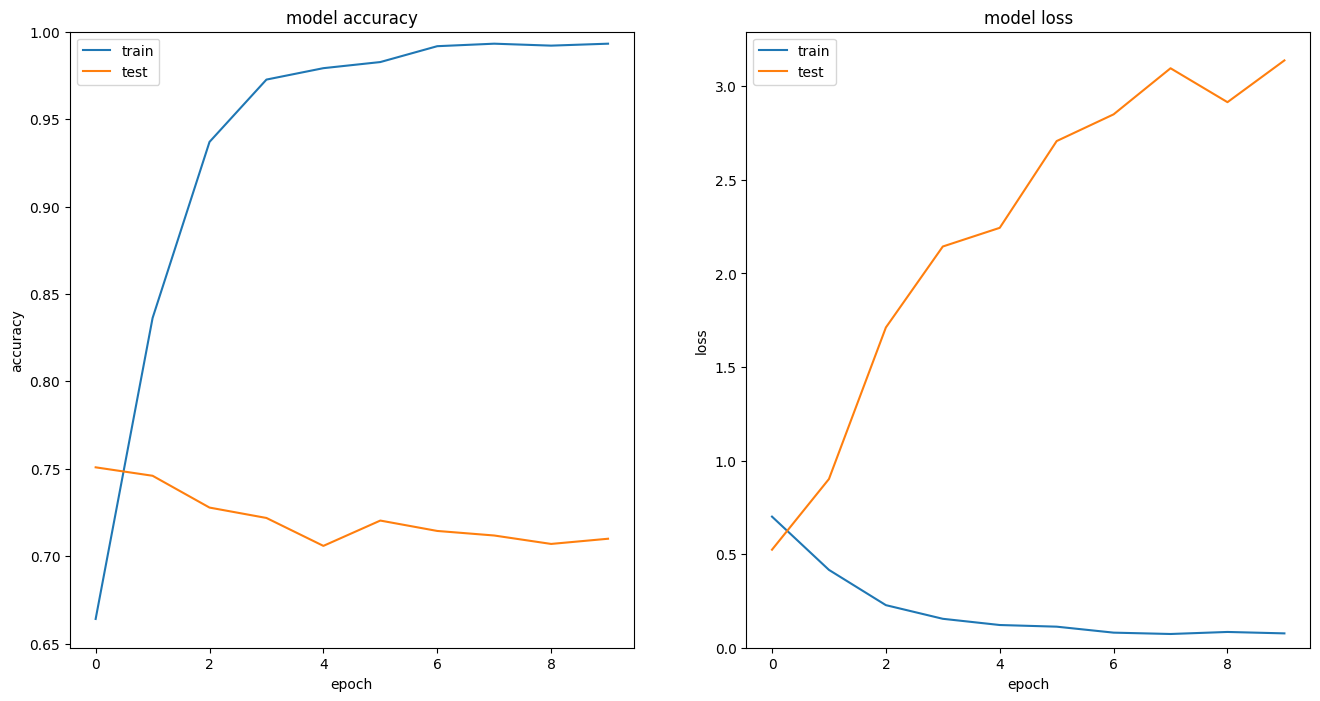

In [127]:
model_history = history
# Model performance charts
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(0, None)


# Results

In [92]:
# Classification report
print(classification_report(y_test, y_test_pred, labels=["Hate","Non-Hate"]))

              precision    recall  f1-score   support

        Hate       0.65      0.67      0.66      1128
    Non-Hate       0.76      0.75      0.75      1565

    accuracy                           0.71      2693
   macro avg       0.71      0.71      0.71      2693
weighted avg       0.71      0.71      0.71      2693



Count: Actual
Non-Hate    1565
Hate        1128
Name: count, dtype: int64

Count: Predict
Non-Hate    1475
Hate        1218
Name: count, dtype: int64



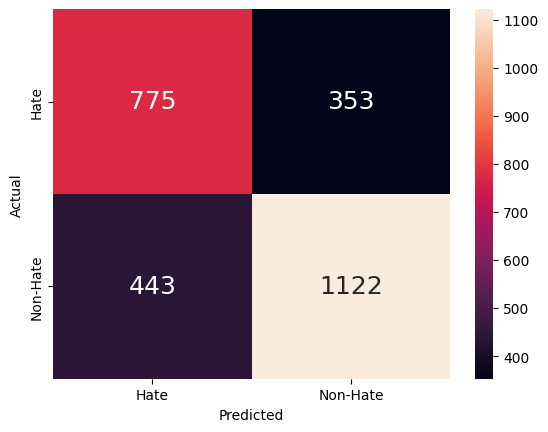

In [136]:
# Heatmap
ax = plt.subplot()

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred, labels=["Hate","Non-Hate"]), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax=ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.xaxis.set_ticklabels(["Hate","Non-Hate"])
ax.yaxis.set_ticklabels(["Hate","Non-Hate"])

# Count
df1 = pd.DataFrame({'Actual':y_test, 'Predict':y_test_pred})
# print(df1.describe())
print(f"Count: {df1['Actual'].value_counts()}")
print()
print(f"Count: {df1['Predict'].value_counts()}")
print()

# Model compare

In [95]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

def get_score(y_test, y_test_pred):
    # print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.2f}")
    # score = precision_recall_fscore_support(y_test, y_test_pred, average="weighted")
    # print(f"Precision: {score[0]:.2f}")
    # print(f"Recall: {score[1]:.2f}")
    # print(f"F1-score: {score[2]:.2f}")
    # print()
    a = accuracy_score(y_test, y_test_pred)
    prf = precision_recall_fscore_support(y_test, y_test_pred, average="weighted")
    return a, prf[0], prf[1], prf[2]
    # print(precision_recall_fscore_support(y_test, y_test_pred, average="micro"))

In [125]:
# load model
def get_result():
    model_to_load = ["dtc", "dtc-tfid", "dtc-w2v","svm", "svm-tfid", "svm-w2v", "lr", "lr-tfid","lr-w2v"]
    c = ["Model", "Accuracy", "Precision", "Recall", "F1-Score"]
    result_table = pd.DataFrame(columns=c)

    for i in model_to_load:
        filename = f"models/{i}.pickle"
        old_model = pickle.load(open(filename,"rb"))
        
        y_test_pred = old_model.predict(x_test)

        a = accuracy_score(y_test, y_test_pred)
        prf = precision_recall_fscore_support(y_test, y_test_pred, average="weighted")

        result_table.loc[len(result_table)] = [i, a, prf[0], prf[1], prf[2]]

    return result_table.style.highlight_max(color = 'red', axis = 0)

def get_result_nn(model_to_load):
    c = ["Model", "Accuracy", "Precision", "Recall", "F1-Score"]
    result_table = pd.DataFrame(columns=c)

    for i in model_to_load:
        filename = f"models/{i}"
        old_model = load_model(filename)

        y_test_pred = old_model.predict(x_test, verbose=0)
        y_test_pred = np.where(y_test_pred > 0.5, "Hate", "Non-Hate") 
        y_test_pred = y_test_pred.flatten()

        a = accuracy_score(y_test, y_test_pred)
        prf = precision_recall_fscore_support(y_test, y_test_pred, average="weighted")

        result_table.loc[len(result_table)] = [i, a, prf[0], prf[1], prf[2]]

    return result_table.style.highlight_max(color = 'red', axis = 0)

In [137]:
get_result_nn(["rnn", "rnn-dropout", "rnn-double"])

,Model,Accuracy,Precision,Recall,F1-Score
0,rnn,0.714816,0.718796,0.714816,0.716045
1,rnn-dropout,0.709989,0.711467,0.709989,0.710594
2,rnn-double,0.704419,0.708576,0.704419,0.705713


In [184]:
get_result_nn(["snn-glove1", "cnn-glove", "lstm-glove"])

,Model,Accuracy,Precision,Recall,F1-Score
0,snn-glove1,0.674712,0.670726,0.674712,0.670636
1,cnn-glove,0.707761,0.710471,0.707761,0.708729
2,lstm-glove,0.735982,0.740558,0.735982,0.737237


In [60]:
get_result_nn(["snn-glove","cnn-glove","lstm-glove"])

,Model,Accuracy,Precision,Recall,F1-Score
0,snn-glove,0.673227,0.669308,0.673227,0.669412
1,cnn-glove,0.708132,0.705622,0.708132,0.705882
2,lstm-glove,0.723357,0.732822,0.723357,0.725116


In [149]:
get_result()

,Model,Accuracy,Precision,Recall,F1-Score
0,dtc,0.749350,0.747932,0.749350,0.748249
1,dtc-tfid,0.743780,0.743531,0.743780,0.743649
2,dtc-w2v,0.586706,0.589898,0.586706,0.588024
3,svm,0.768659,0.767394,0.768659,0.766195
4,svm-tfid,0.746008,0.760112,0.746008,0.731861
5,svm-w2v,0.590048,0.611645,0.590048,0.461541
6,lr,0.684738,0.690064,0.684738,0.686326
7,lr-tfid,0.694393,0.697312,0.694393,0.695449
8,lr-w2v,0.708504,0.705758,0.708504,0.705809


In [241]:
get_result()

,Model,Accuracy,Precision,Recall,F1-Score
0,dtc,0.762347,0.762231,0.762347,0.762287
1,dtc-tfid,0.744523,0.744717,0.744523,0.744616
2,dtc-w2v,0.583364,0.585593,0.583364,0.584338
3,svm,0.773115,0.774587,0.773115,0.768277
4,svm-tfid,0.743780,0.767172,0.743780,0.725699
5,svm-w2v,0.597104,0.605277,0.597104,0.498157
6,lr,0.726328,0.729749,0.726328,0.727414
7,lr-tfid,0.725956,0.728042,0.725956,0.726728
8,lr-w2v,0.705904,0.703003,0.705904,0.700796
